In [3]:
#задание
#1.1.1 Пример
def qz(x, y):
    return (x+3*y-3)/(3*x**2+y**2+1)

def qsumz(z):
    return sum(z)

def exchange(oldx, oldy, sortedid):
    x = [0 for i in range(4)]
    y = [0 for i in range(4)]
    x[0] = oldx[sortedid[0]]
    x[1] = oldx[sortedid[1]]
    x[2] = oldx[sortedid[2]]
    x[3] = oldx[sortedid[2]]
    
    y[0] = oldx[sortedid[2]]
    y[1] = oldx[sortedid[2]]
    y[2] = oldx[sortedid[0]]
    y[3] = oldx[sortedid[1]]
    return x, y

def sorting(z):
    sortedid = sorted(range(len(z)), key=lambda k:z[k])
    return sortedid

def evostep(x, y, z):
    _, minid = min((value, id) for (id, value) in enumerate(z))
    x = x[:]
    y = y[:]
    z = z[:]
    
    x.pop(minid)
    y.pop(minid)
    z.pop(minid)
    
    return x, y, z

def evosteps(x, y, stepnum = 4):
    res = []
    for i in range(4):
        arrz = [qz(X, y[i]) for i, X in enumerate(x)]
        
        x, y, z = evostep(x, y, arrz)
        x, y = exchange(x, y, sorting(z))
        res.append([x, y, qsumz(arrz), arrz])
    return x, y, res


x = [-5, -3, -2, 0]
y = [-1, -2, 0, 1]
res = evosteps(x, y)
for i in range(len(res[2])):
    print(f'max_{i+1}_step: {res[2][i][2]}')
qualityarr = []
for i in range(len(res[2])):
    qualityarr += res[2][i][3]
print(f'max z: {max(qualityarr)}')

max_1_step: -0.9024725274725274
max_2_step: -2.2118565644881434
max_3_step: -1.3937972652967685
max_4_step: -1.0516719596487951
max z: 0.0


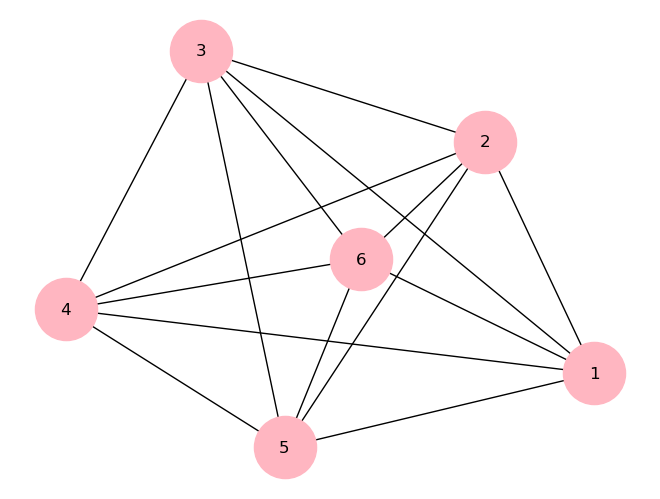

лучший маршрут: [1, 6, 5, 4, 3, 2, 1]
длинна маршрута: 130
длинны всех маршрутов: [145, 158, 183, 130, 146]


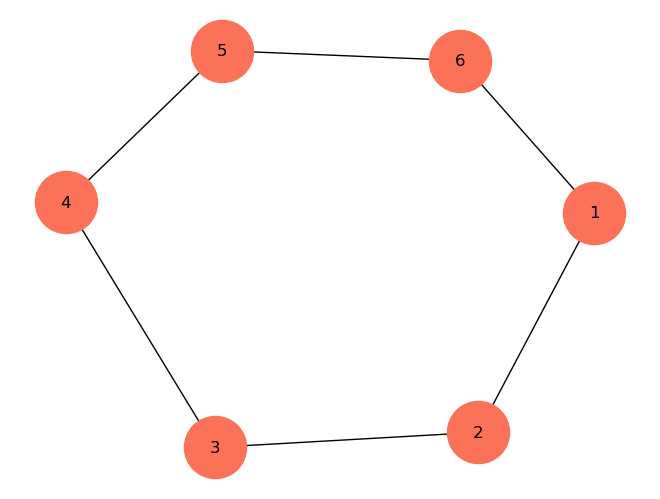

In [26]:
#задание
#1.2.1 Пример
import networkx as nx
from math import e
import matplotlib.pyplot as plt

distances = [(1, 2, 24), 
            (1, 3, 41), 
            (1, 4, 36),
            (1, 5, 22),
            (1, 6, 19),
            (2, 3, 21),
            (2, 4, 33),
            (2, 5, 33),
            (2, 6, 14),
            (3, 4, 27),
            (3, 5, 39),
            (3, 6, 23),
            (4, 5, 20),
            (4, 6, 20),
            (5, 6, 19)]

v = [1, 3, 4, 5, 6, 2, 1]
z = [(3, 4), (4, 6), (5, 2), (6, 2)]
p = [33, 82, 51, 76]
t = 100



def probability(delta, t):
    return 100*e**(-delta/t)

def reducttemp(prevt):
    nextt = 0.5*prevt
    return nextt

def edgelen(i, j, distances, roundTrip= True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[0] == j and item[1] == i) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routelen(v, distances):
    edges = []
    for i in range(len(v)-1):
        edges.append(edgelen(v[i], v[i+1], distances))
    return sum(edges)

def routeonereplacement(arrv, z, repbyname=True):
    if repbyname:
        decrement = 1
    else:
        decrement = 0
    arrv[z[0] - decrement] ,arrv[z[1]-decrement] = arrv[z[1]-decrement] , arrv[z[0] - decrement]
    return arrv

def routereplacement(v, z):
    for Z in z:
        v = routeonereplacement(v, Z)
    return v

def chooseroute(distances, v, z, t, p):
    summlen = routelen(v, distances)
    arrsum = [summlen]
    for i in range(len(z)):
        newv = routeonereplacement(v[:], z[i])
        news = routelen(newv, distances)
        arrsum.append(news)
        deltas = news - summlen
        
        if deltas>0:
            P = probability(deltas, t)
            if P > p[i]:
                v = newv
                summlen = news
        else:
            v = newv
            summlen = news
            
        t = reducttemp(t)
    return v, arrsum

def drawraph(distances, bestroute):
    newdist = []
    for i in range(len(bestroute) - 1):
        for distance in distances:
            if distance[0] == bestroute[i] and distance[1] == bestroute[i+1] or distance[1] == bestroute[i] and distance[0] == bestroute[i+1]:
                newdist.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newdist)
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

    
graph1 = nx.Graph()
graph1.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph1, node_color = '#ffb6c1', node_size = 2000, with_labels = True)
plt.show()
bestroute, arrlen = chooseroute(distances, v, z, t, p)
print(f'лучший маршрут: {bestroute}')
print(f'длинна маршрута: {routelen(bestroute, distances)}')
print(f'длинны всех маршрутов: {arrlen}')

drawraph(distances, bestroute)
    
